# Visual Presentation of used operators

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Standard library imports

### Thrid Party libraries imports

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance

### Modules imports

In [43]:
%autoreload 2

from source.operators.continuous import crossover, mutation
from source.operators.multimodal import apply_objective
from source.spea_optimizer import SPEAOptimizer

### Sample objective

In [29]:
def schaffer_objective(x):
    return [x**2, (x - 2)**2]

### Mutation Operator

In [6]:
population = np.random.rand(200).reshape(100, 2)
mutated = np.apply_along_axis(mutation, 0, population, 0.1)

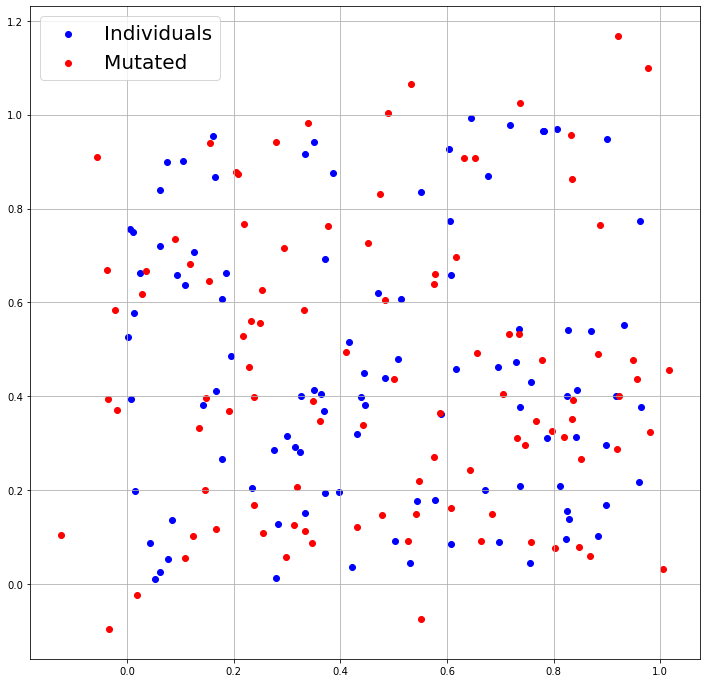

In [7]:
figure = plt.figure(figsize=[12, 12])

plt.scatter(population[:, 0], population[:, 1], c='b')
plt.scatter(mutated[:, 0], mutated[:, 1], c='r')
plt.legend(['Individuals', 'Mutated'], prop={'size': 20})

plt.grid()

### Crossover Operator

In [8]:
parents = 100 * np.random.rand(4).reshape(2, 2)
offspring = crossover(parents)

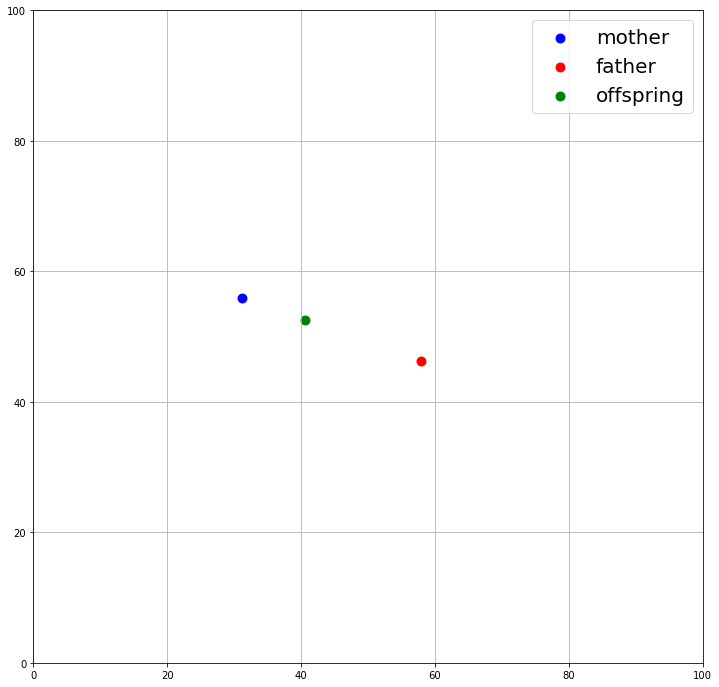

In [9]:
figure = plt.figure(figsize=[12, 12])

plt.scatter(parents[0, 0], parents[0, 1], c='b', s=80)
plt.scatter(parents[1, 0], parents[1, 1], c='r', s=80)
plt.scatter(offspring[0], offspring[1], c='g', s=80)

plt.xlim([0, 100])
plt.ylim([0, 100])

plt.legend(['mother', 'father', 'offspring'], prop={'size': 20})

plt.grid()

In [125]:
in_vector = 5 * np.random.randint(0, 100, 20).reshape(10, 2)
solutions = in_vector

In [121]:
solutions = np.apply_along_axis(schaffer_objective, 1, in_vector)

In [142]:
solutions

array([[345,  15],
       [135, 475],
       [220,  65],
       [255, 315],
       [190, 280],
       [ 80, 140],
       [ 70, 280],
       [415, 150],
       [255, 180],
       [275, 335]])

In [153]:
non_dominated = []
for solution in solutions:
    non_dominated.append(np.all(np.logical_or(np.less_equal(solution[0], solutions[:, 0]), np.less_equal(solution[1], solutions[:, 1]))))

non_dominated = np.array(non_dominated)
non_dominated = np.where(non_dominated == True)

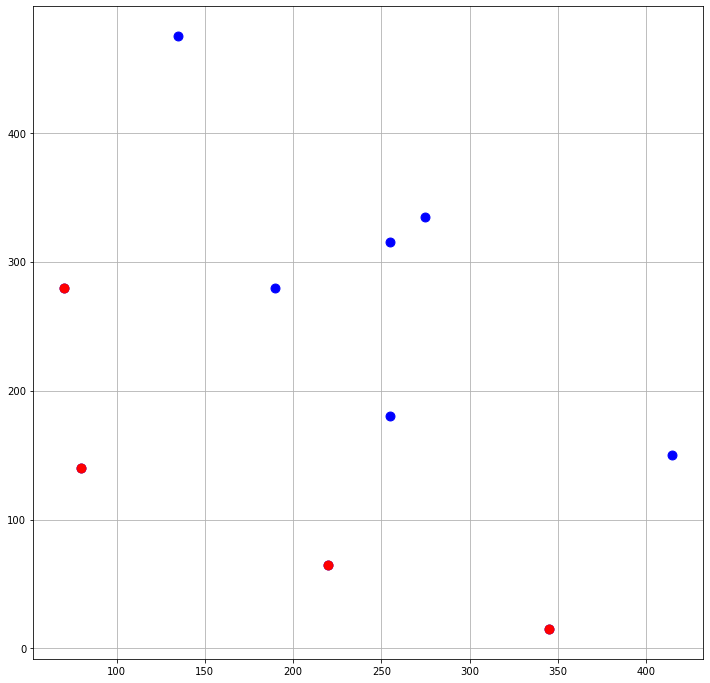

In [156]:
figure = plt.figure(figsize=[12, 12])

plt.scatter(solutions[:, 0], solutions[:, 1], c='b', s=80)
plt.scatter(solutions[non_dominated, 0], solutions[non_dominated, 1], c='r', s=80)

plt.grid()